In [1]:
import pandas as pd
import pandas_datareader.data as pdr
import datetime

start = datetime.datetime(1900, 1, 1)
end = datetime.datetime.now()

gdp = pdr.DataReader('GDPC1', 'fred', start, end)
gdp

,GDPC1
DATE,
1947-01-01,2033.061
1947-04-01,2027.639
1947-07-01,2023.452
1947-10-01,2055.103
1948-01-01,2086.017
...,...
2018-07-01,18732.720
2018-10-01,18783.548
2019-01-01,18927.281


In [2]:
gdp['GDP Change'] = gdp['GDPC1'].pct_change()
gdp

,GDPC1,GDP Change
DATE,,
1947-01-01,2033.061,NaN
1947-04-01,2027.639,-0.002667
1947-07-01,2023.452,-0.002065
1947-10-01,2055.103,0.015642
1948-01-01,2086.017,0.015043
...,...,...
2018-07-01,18732.720,0.007236
2018-10-01,18783.548,0.002713
2019-01-01,18927.281,0.007652


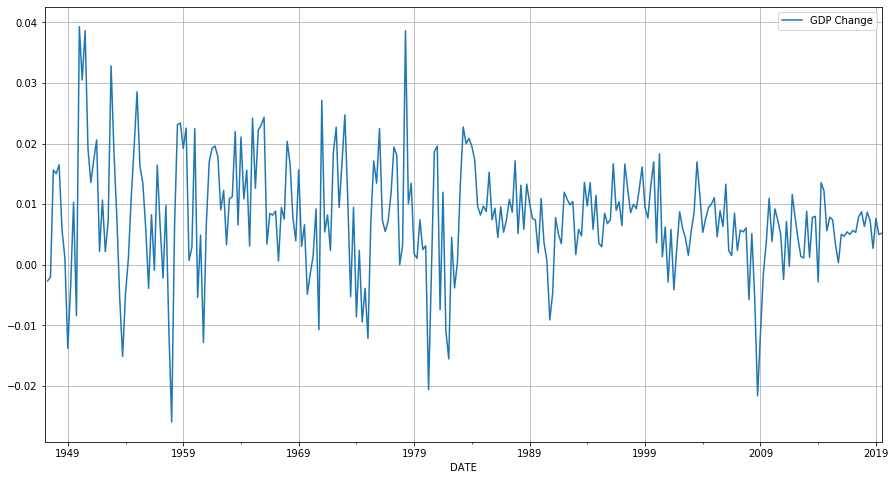

In [3]:
gdp[['GDP Change']].plot(kind='line', figsize=(15,8), grid=True)

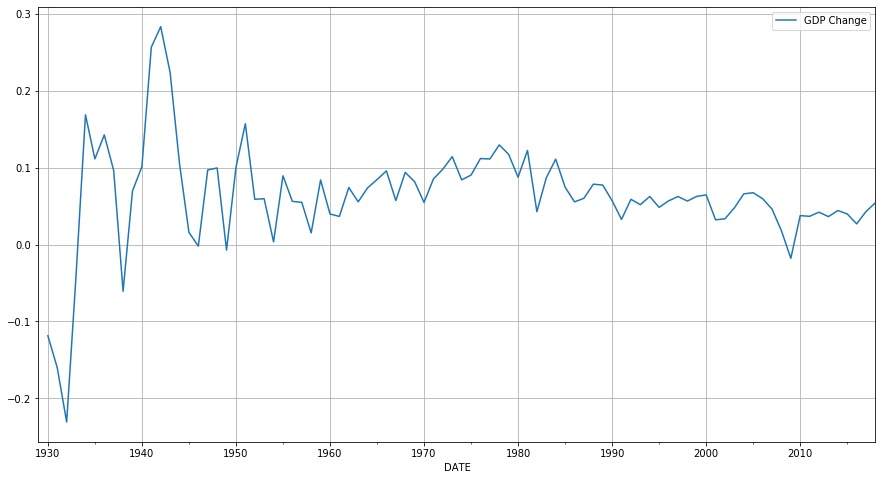

In [4]:
gdpa = pdr.DataReader('GDPA', 'fred', start, end)
gdpa['GDP Change'] = gdpa['GDPA'].pct_change()
gdpa[['GDP Change']].plot(kind='line', figsize=(15,8), grid=True)

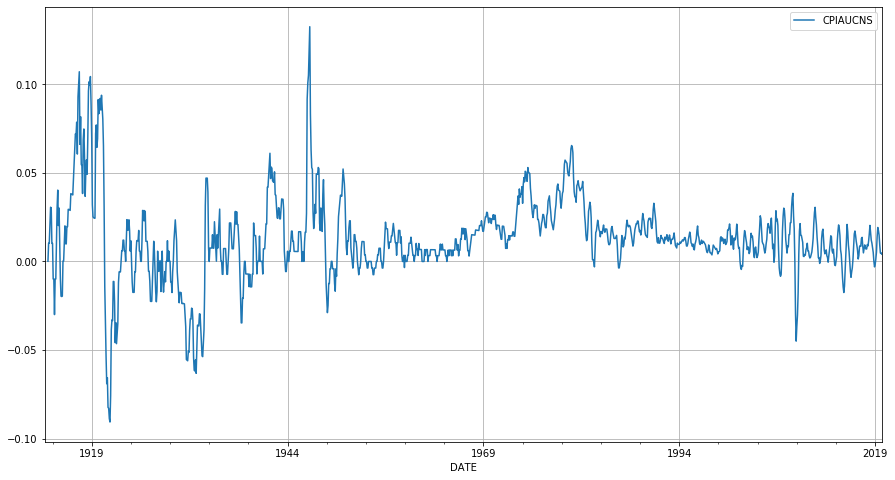

In [28]:
inflation = pdr.DataReader('CPIAUCNS', 'fred', start, end)
inflation['CPIAUCNS'] = inflation['CPIAUCNS'].pct_change().rolling(5).sum()
inflation.plot(figsize=(15,8), grid=True)

In [29]:
ten_yr = pdr.DataReader('DGS10', 'fred', start, end)
public_debt = pdr.DataReader('GFDEGDQ188S', 'fred', start, end)

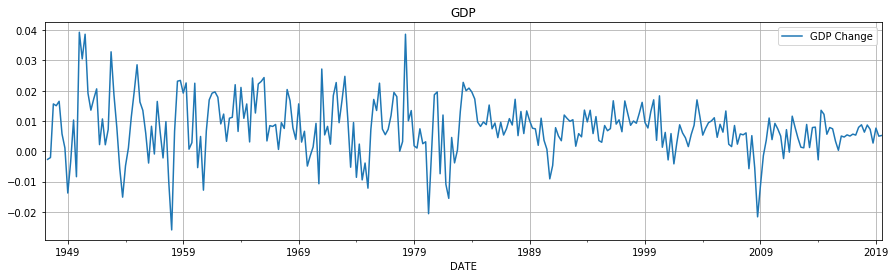

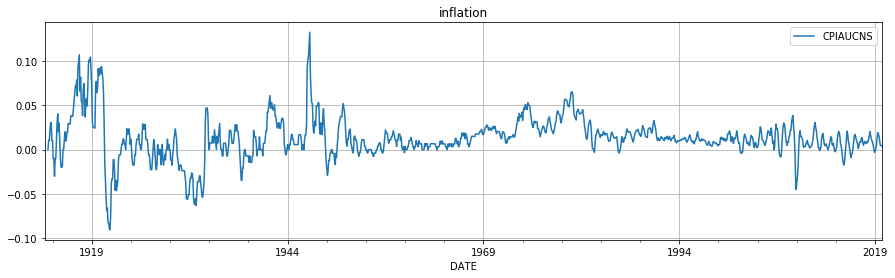

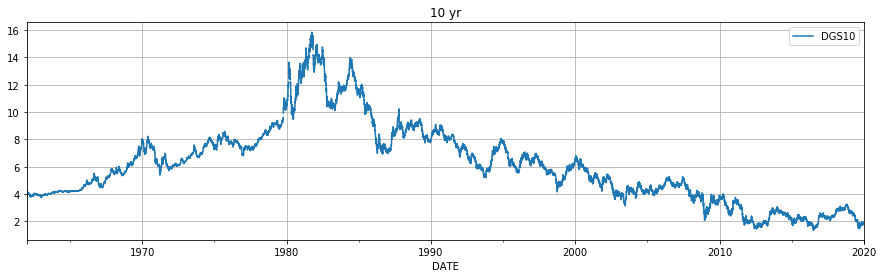

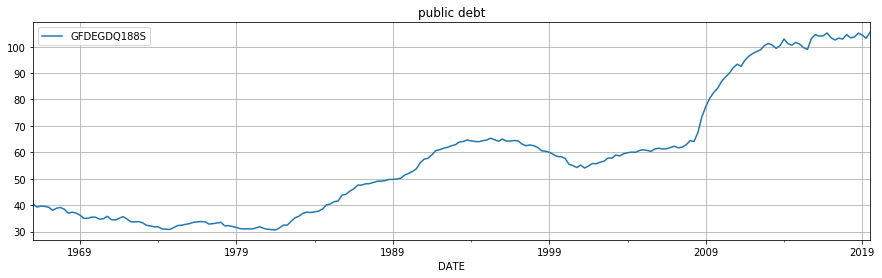

In [30]:
gdp[['GDP Change']].plot(kind='line', figsize=(15,4), grid=True, title='GDP')
inflation.plot(kind='line', figsize=(15,4), grid=True, title='inflation')
ten_yr.plot(kind='line', figsize=(15,4), grid=True, title='10 yr')
public_debt.plot(kind='line', figsize=(15,4), grid=True, title='public debt')

In [31]:
display = pd.merge_asof(left=gdp[['GDP Change']], right=ten_yr, on='DATE')
display = pd.merge_asof(left=display.copy(), right=inflation, on='DATE')
display = pd.merge_asof(left=display.copy(), right=public_debt, on='DATE')
display = display.set_index('DATE')
display

,GDP Change,DGS10,CPIAUCNS,GFDEGDQ188S
DATE,,,,
1947-01-01,NaN,NaN,0.062937,NaN
1947-04-01,-0.002667,NaN,0.027994,NaN
1947-07-01,-0.002065,NaN,0.032262,NaN
1947-10-01,0.015642,NaN,0.049393,NaN
1948-01-01,0.015043,NaN,0.052378,NaN
...,...,...,...,...
2018-07-01,0.007236,2.85,0.012056,103.69309
2018-10-01,0.002713,3.09,0.005146,105.15026
2019-01-01,0.007652,NaN,-0.001708,104.40334


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1250baf50>,
      dtype=object)

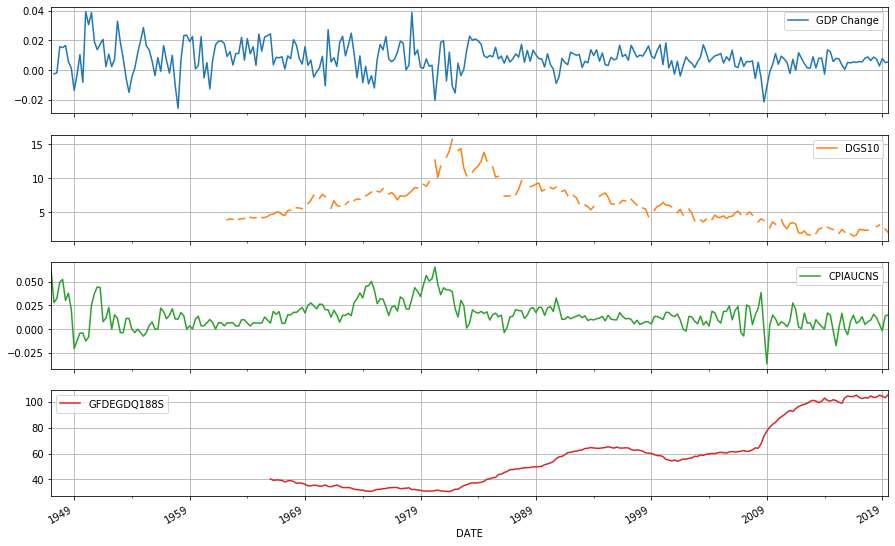

In [32]:
display.plot(subplots=True, figsize=(15,10), grid=True)

In [33]:
def get_fred_data(symbols, start = datetime.datetime(1900, 1, 1), end = datetime.datetime.now()):
    result = None
    for symbol in symbols:
        df = pdr.DataReader(symbol['symbol'], 'fred', start, end)
        df = df.rename(columns={df.columns[0]: symbol['title']})
        if result is None:
            result = df.copy()
        else:
            result = pd.merge_asof(left=result.copy(), right=df, on='DATE')
           
    result = result.set_index('DATE')
    return result

array([<matplotlib.axes._subplots.AxesSubplot object at 0x125d8e6d0>,
      dtype=object)

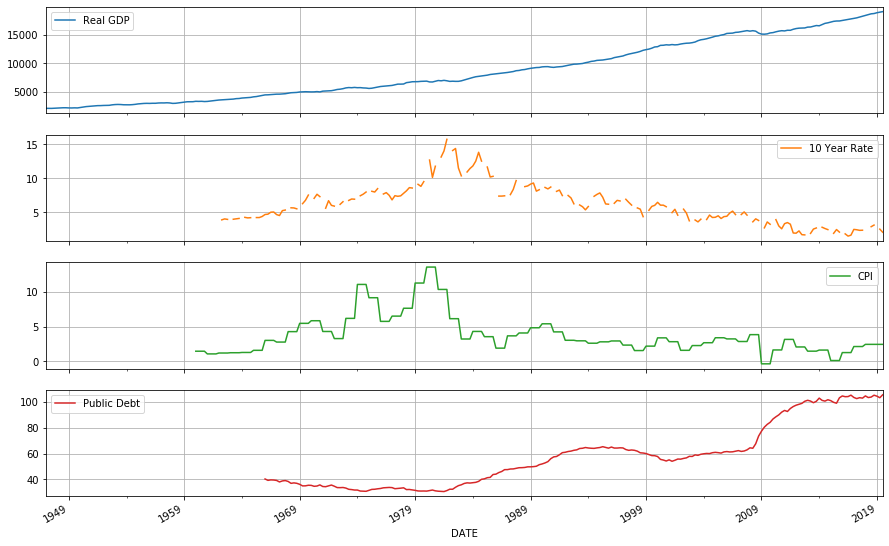

In [34]:
symbols = [
    {'symbol': 'GDPC1', 'title': 'Real GDP'},
    {'symbol': 'DGS10', 'title': '10 Year Rate'},
    {'symbol': 'CPIAUCNS', 'title': 'CPI'},
    {'symbol': 'GFDEGDQ188S', 'title': 'Public Debt'},
]
fred_data = get_fred_data(symbols)
fred_data.plot(subplots=True, figsize=(15,10), grid=True)

In [12]:
fred_data

,Real GDP,10 Year Rate,CPI,Public Debt
DATE,,,,
1947-01-01,2033.061,NaN,NaN,NaN
1947-04-01,2027.639,NaN,NaN,NaN
1947-07-01,2023.452,NaN,NaN,NaN
1947-10-01,2055.103,NaN,NaN,NaN
1948-01-01,2086.017,NaN,NaN,NaN
...,...,...,...,...
2018-07-01,18732.720,2.85,2.442583,103.69309
2018-10-01,18783.548,3.09,2.442583,105.15026
2019-01-01,18927.281,NaN,2.442583,104.40334


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1231e3790>,
      dtype=object)

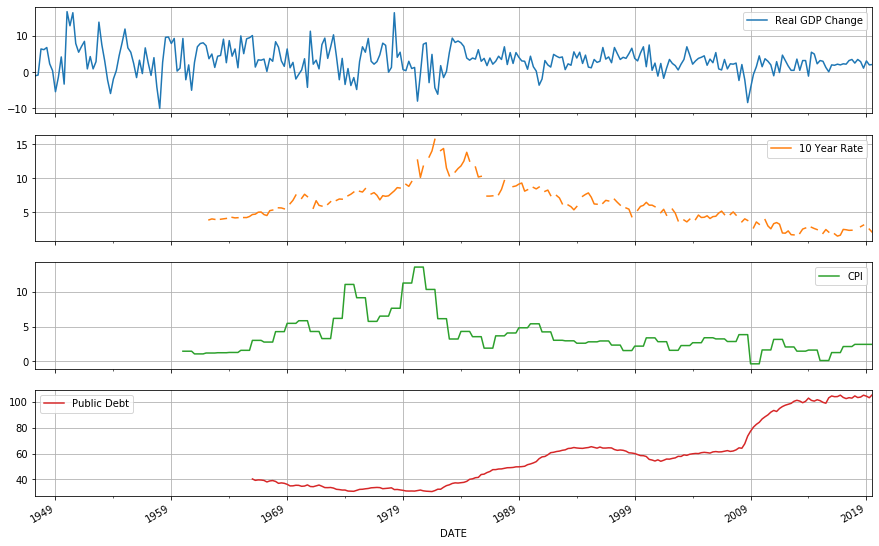

In [13]:
symbols = [
    {'symbol': 'A191RL1Q225SBEA', 'title': 'Real GDP Change'},
    {'symbol': 'DGS10', 'title': '10 Year Rate'},
    {'symbol': 'CPIAUCNS', 'title': 'CPI'},
    {'symbol': 'GFDEGDQ188S', 'title': 'Public Debt'},
]
fred_data = get_fred_data(symbols)
fred_data.plot(subplots=True, figsize=(15,10), grid=True)

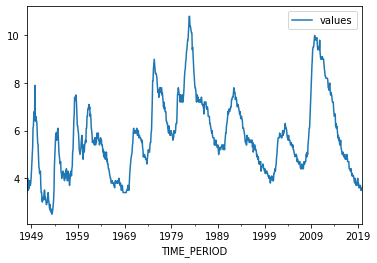

In [14]:
df = pdr.DataReader('ticker=URATEUS', 'econdb', start, end)
df.plot()

In [15]:
df

,values
TIME_PERIOD,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
...,...
2019-07-01,3.7
2019-08-01,3.7
2019-09-01,3.5


In [16]:
def get_econb_data(symbols, start = datetime.datetime(1900, 1, 1), end = datetime.datetime.now()):
    result = None
    for symbol in symbols:
        ticker = "ticker={}".format(symbol['symbol'])
        df = pdr.DataReader(ticker, 'econdb', start, end)
        df = df.rename(columns={'values': symbol['title']})
        if result is None:
            result = df.copy()
        else:
            result = pd.merge_asof(left=result.copy(), right=df, on='TIME_PERIOD')
           
    result = result.set_index('TIME_PERIOD')
    return result

In [17]:
symbols = [
    {'symbol': 'URATEUS', 'title': 'US Unemployment'},
    {'symbol': 'URATECA', 'title': 'Canada Unemployment'},
    {'symbol': 'URATEUK', 'title': 'UK Unemployment'},
    {'symbol': 'URATECN', 'title': 'China Unemployment'},
]
fred_data = get_econb_data(symbols)
fred_data.plot(figsize=(15,10), grid=True)

MergeError: incompatible merge keys [0] dtype('<M8[ns]') and dtype('float64'), must be the same type